# Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm, boxcox
from scipy import stats
from pandas_profiling import ProfileReport
import plotly.express as px
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
import warnings
warnings.simplefilter(action='ignore', category=Warning)


# Loading Dataset

In [2]:
dataset = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv', index_col=0)


# Exploratory Data Analysis


## 1) Using Manual Methods

In [3]:
dataset.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
dataset.shape

(200, 4)

In [5]:
dataset.describe()


,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [7]:
dataset.isnull().values.any()


False

## Plotting Count for Annual Income

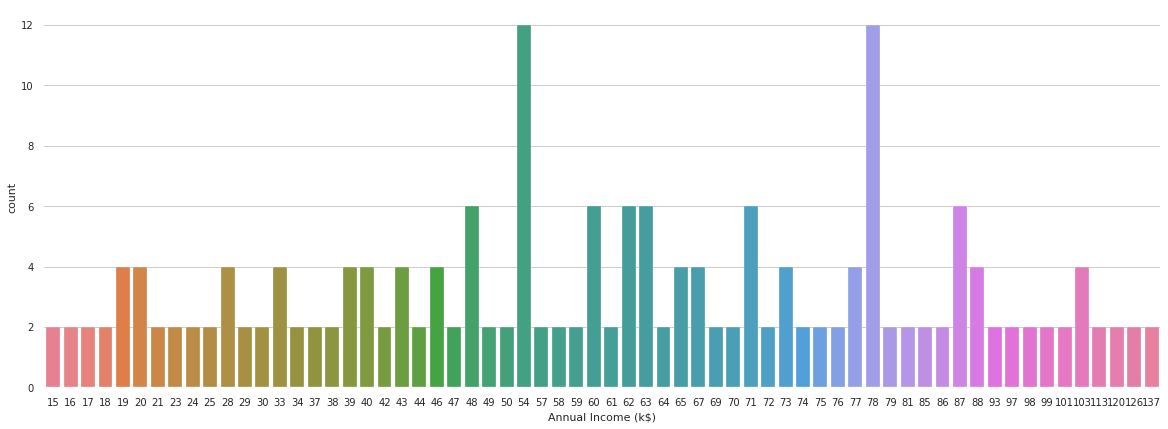

In [8]:
sns.set_style('whitegrid')
plt.figure(figsize=(20, 7))
sns.countplot(x="Annual Income (k$)", data=dataset, palette='husl');


## Finding Correlation among the variables

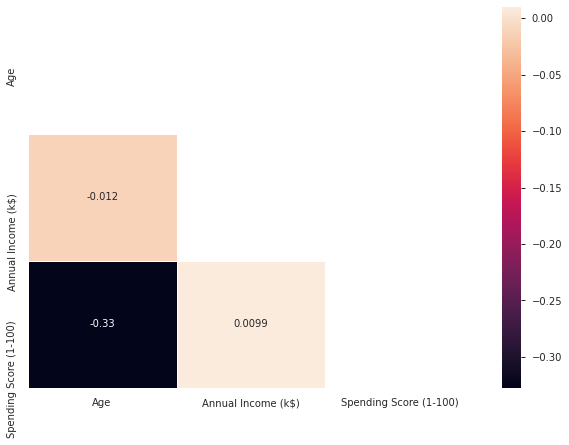

In [9]:
plt.figure(figsize=(10, 7))
matrix = np.triu(dataset.corr())
sns.heatmap(dataset.corr(), annot=True,linewidth=.8, mask=matrix, cmap="rocket");


## Plotting Distribution for each Column in dataset

In [10]:
def distributionPlot(columnName):
    if not columnName == 'Gender':
        plt.figure()
        sns.distplot(dataset[columnName], color="lightcoral", rug=True);


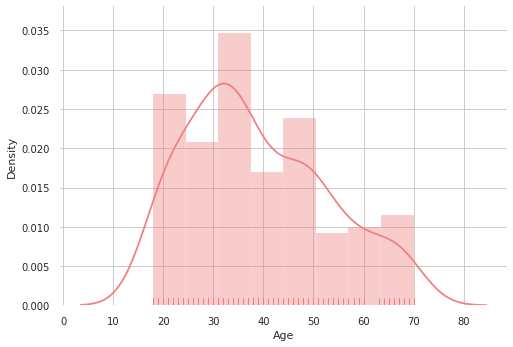

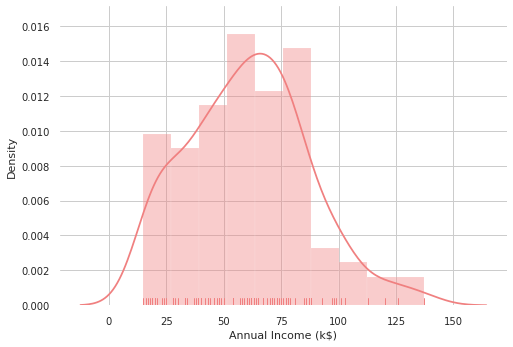

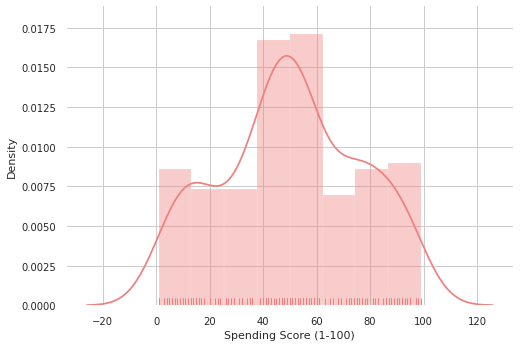

In [11]:
for column in dataset.columns:
    distributionPlot(column)

## Distribution of Males and Females in dataset

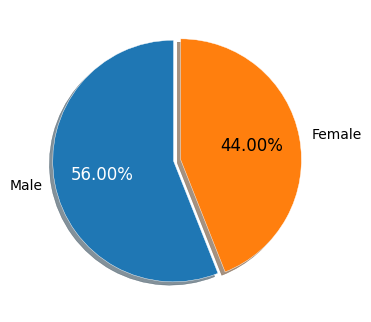

In [12]:
values = dataset['Gender'].value_counts()
labels = ['Male', 'Female']

fig, ax = plt.subplots(figsize=(4, 4), dpi=100)
explode = (0, 0.06)

patches, texts, autotexts = ax.pie(values, labels=labels, autopct='%1.2f%%', shadow=True,
                                   startangle=90, explode=explode)

plt.setp(texts, color='black')
plt.setp(autotexts, size=12, color='white')
autotexts[1].set_color('black')
plt.show()


## Plotting Distribution of Males in dataset

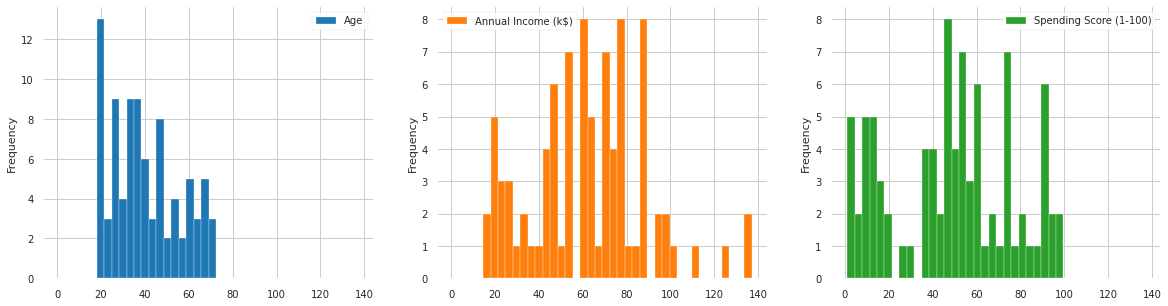

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
sdat = dataset.groupby(by='Gender')
sdat.get_group("Male").plot(kind='hist', ax=ax, subplots=True, bins=40);


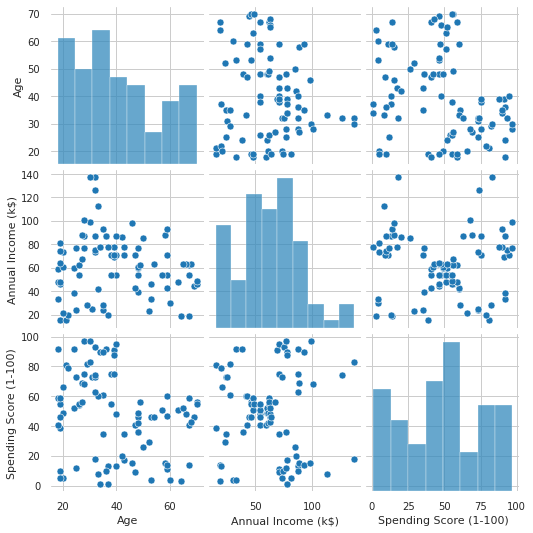

In [14]:
sns.pairplot(sdat.get_group("Male"));


## Plotting Distribution of Females in dataset

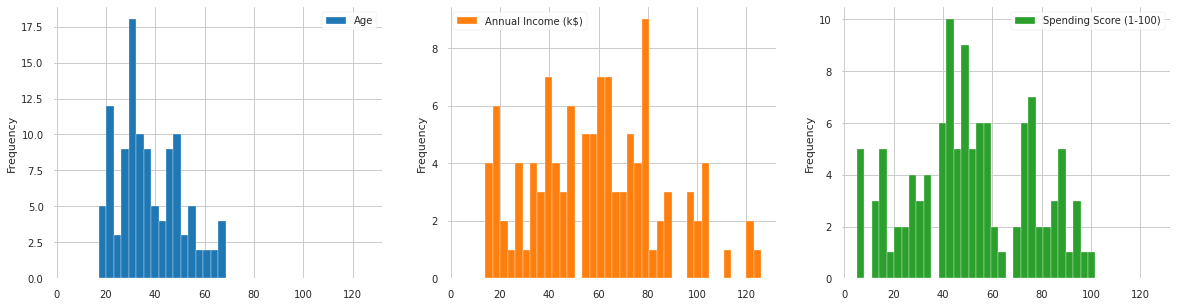

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
sdat = dataset.groupby(by='Gender')
sdat.get_group("Female").plot(kind='hist', ax=ax, subplots=True, bins=40);


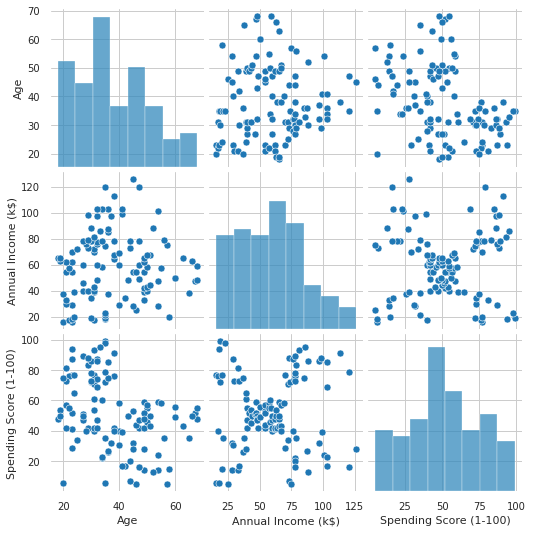

In [16]:
sns.pairplot(sdat.get_group("Female"));


## Skewness Correction
I found out there were some columns with skewness in the dataset. Here, I'm trying to correct that Skewness

In [17]:
def skewnessCorrector(columnName):
    print('''Before Correcting''')
    (mu, sigma) = norm.fit(dataset[columnName])
    print("Mu before correcting {} : {}, Sigma before correcting {} : {}".format(
        columnName.capitalize(), mu, columnName.capitalize(), sigma))
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    sns.distplot(dataset[columnName], fit=norm, color="lightcoral");
    plt.title(columnName.capitalize() +
              " Distplot before Skewness Correction", color="black")
    plt.subplot(1, 2, 2)
    stats.probplot(dataset[columnName], plot=plt)
    plt.show()
    dataset[columnName], lam_fixed_acidity = boxcox(
        dataset[columnName])
    print('''After Correcting''')
    print("Mu after correcting {} : {}, Sigma after correcting {} : {}".format(
        columnName.capitalize(), mu, columnName.capitalize(), sigma))
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    sns.distplot(dataset[columnName], fit=norm, color="orange");
    plt.title(columnName.capitalize() +
              " Distplot After Skewness Correction", color="black")
    plt.subplot(1, 2, 2)
    stats.probplot(dataset[columnName], plot=plt)
    plt.show()


Before Correcting
Mu before correcting Age : 38.85, Sigma before correcting Age : 13.934041050606963


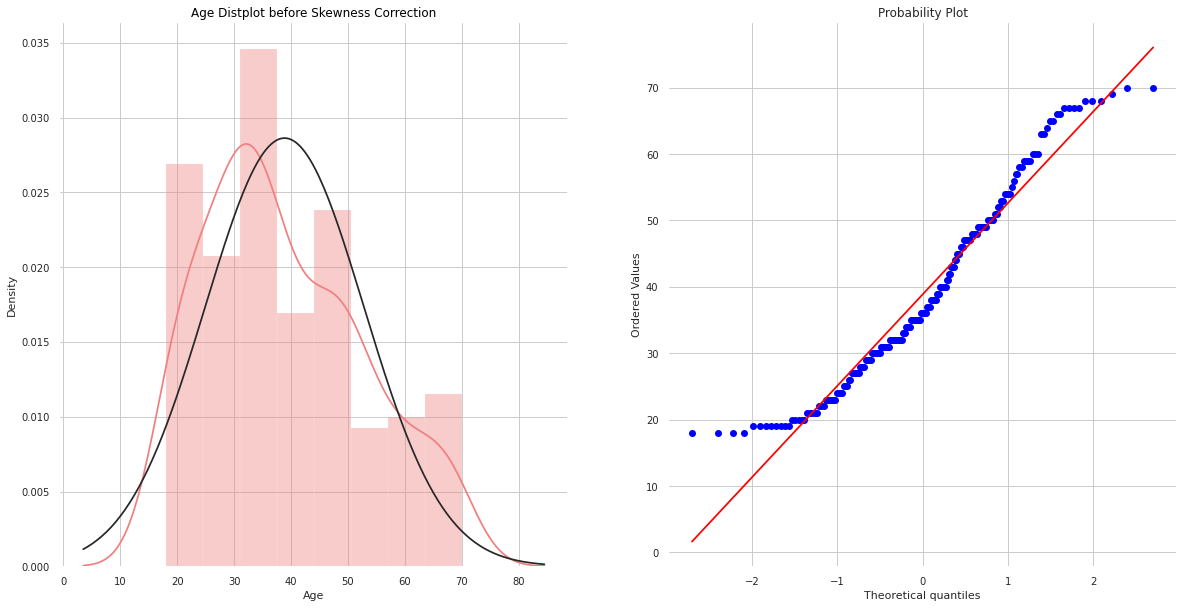

After Correcting
Mu after correcting Age : 38.85, Sigma after correcting Age : 13.934041050606963


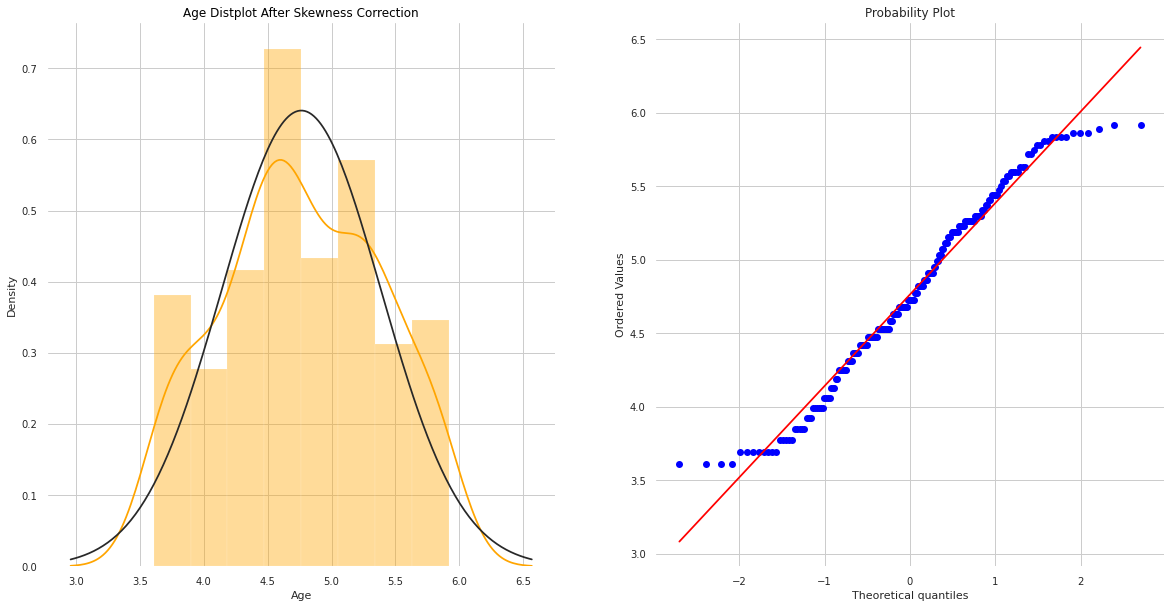

Before Correcting
Mu before correcting Annual income (k$) : 60.56, Sigma before correcting Annual income (k$) : 26.19897707926781


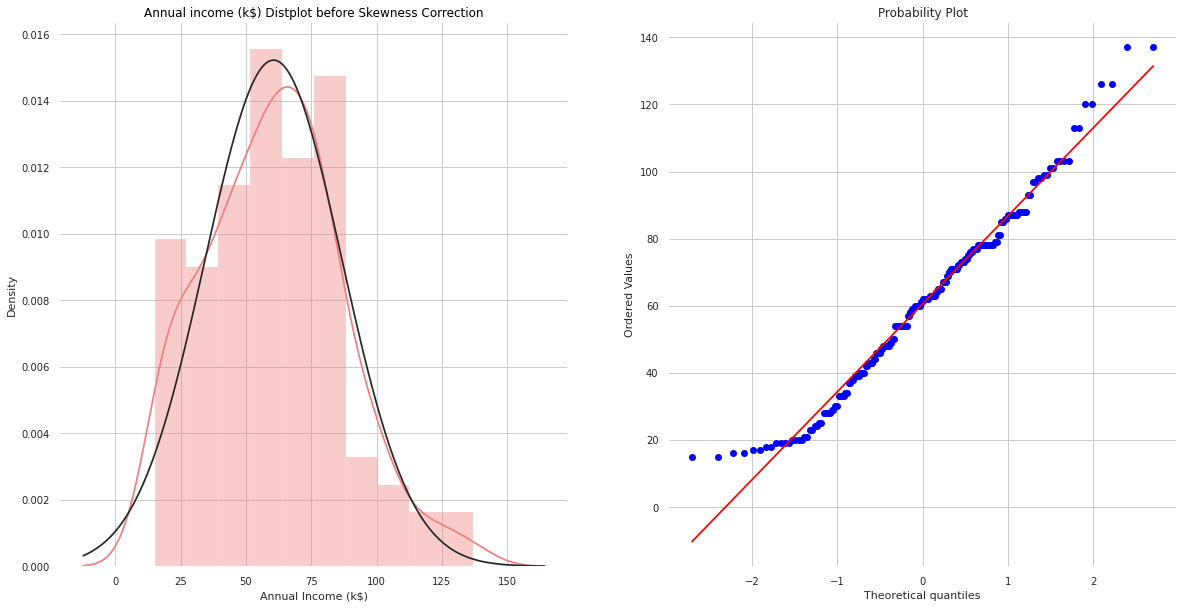

After Correcting
Mu after correcting Annual income (k$) : 60.56, Sigma after correcting Annual income (k$) : 26.19897707926781


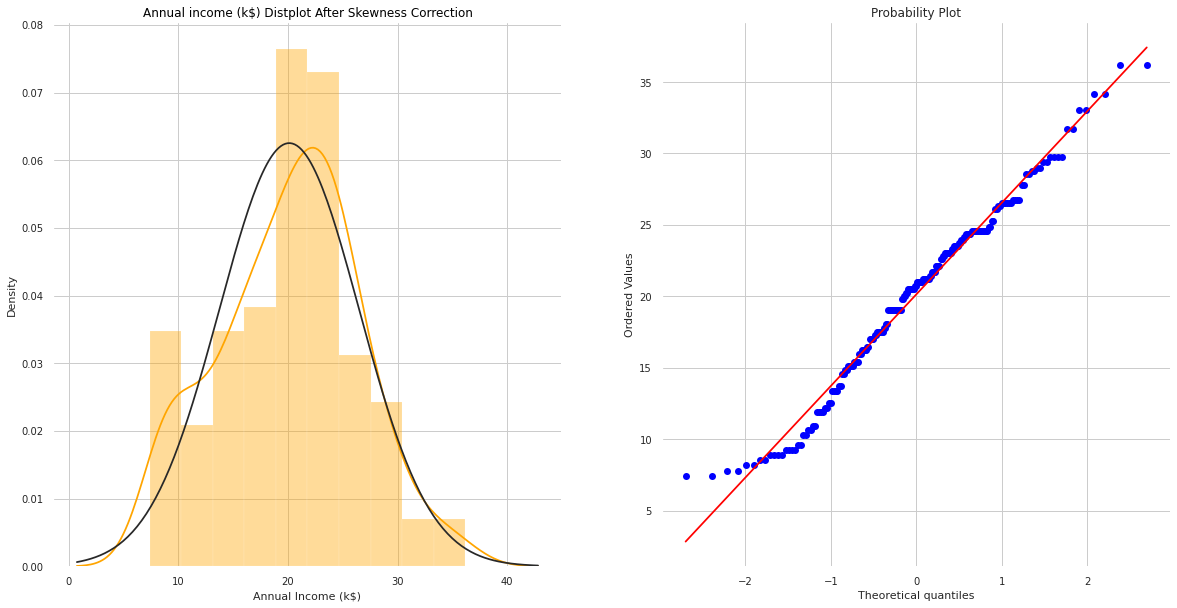

Before Correcting
Mu before correcting Spending score (1-100) : 50.2, Sigma before correcting Spending score (1-100) : 25.7588819633151


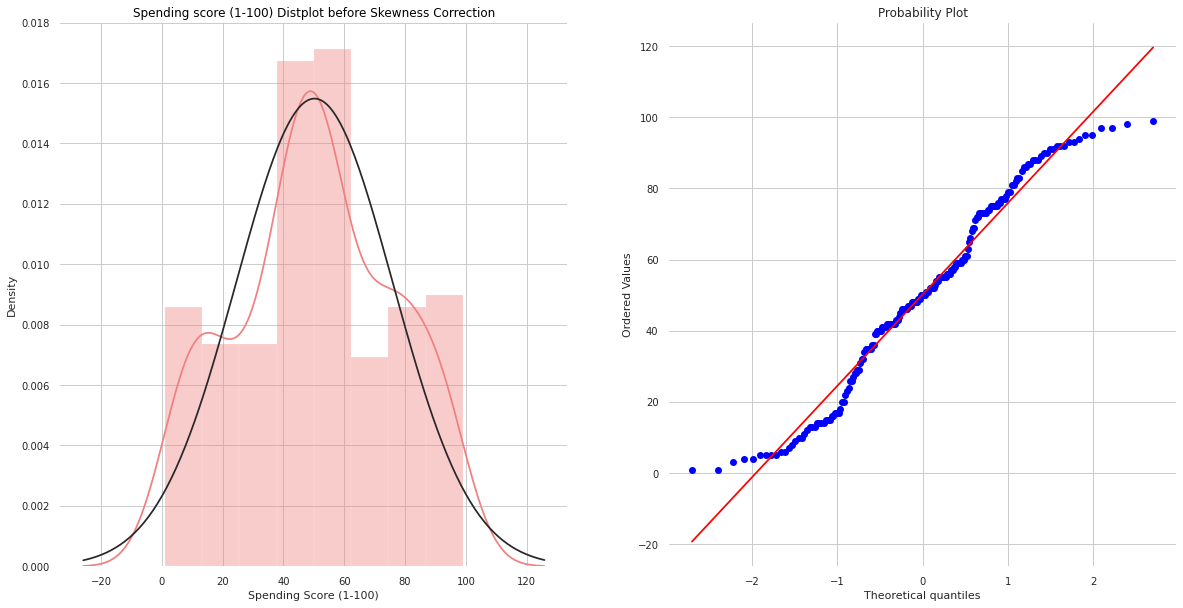

After Correcting
Mu after correcting Spending score (1-100) : 50.2, Sigma after correcting Spending score (1-100) : 25.7588819633151


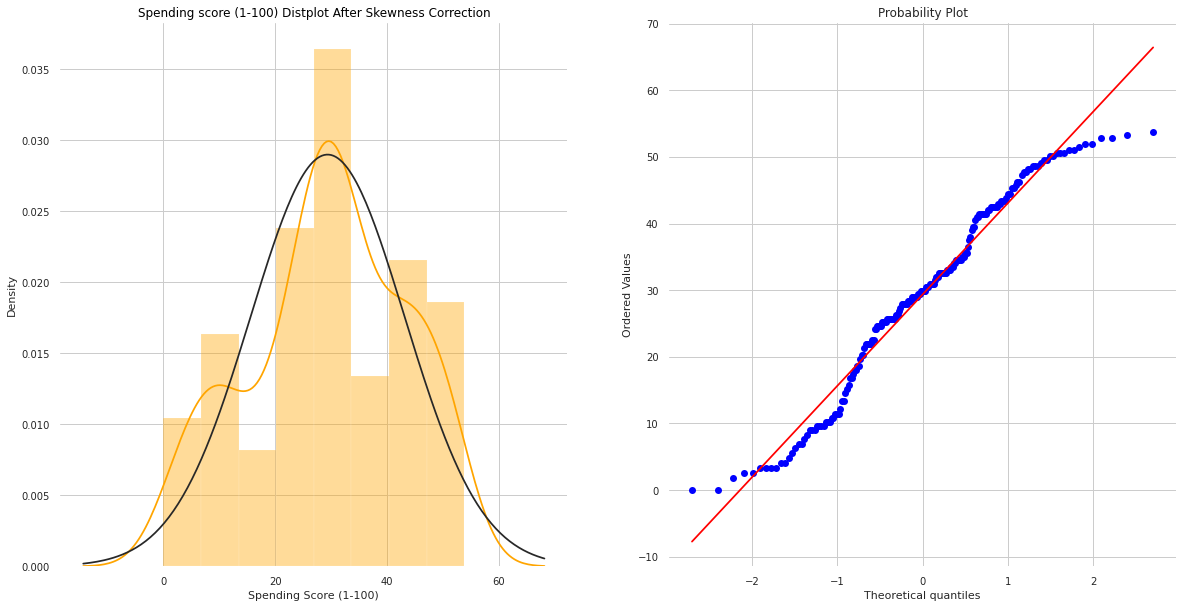

In [18]:
skewColumnList = ['Age',
                  'Annual Income (k$)', 'Spending Score (1-100)']
for columns in skewColumnList:
    skewnessCorrector(columns)


# 2) Using Pandas Profiling

In [19]:
# pip install pandas_profiling

In [20]:
ProfileReport(dataset)

Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Training Clustering Models on Dataset

## Function to find the optimal number of clusters using elbow method

In [21]:
def elbowOptimizer(data):
    """Plots a Elbow Chart on the data provided"""
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, 11), wcss)
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show();


## Function to find optimal numbers of clusters using Dendograms

In [22]:
def dendoOptimizer(data):
    """Plots a Dendogram Plot on the data provided"""
    sch.dendrogram(sch.linkage(data, method='ward'))
    plt.title('Dendrogram')
    plt.xlabel('Customers')
    plt.ylabel('Euclidean distances')
    plt.show()


## Function for Training K-Means Model on Given Data

In [23]:
def kmeansTrainer(numberOfClusters, data):
    """
    Trains KMeans Clustering Algorithm on data with
    number of clusters provided and Returns corresponding Model and Labels
    """
    kmeans = KMeans(n_clusters=numberOfClusters, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(data)
    return (kmeans,labels)


## Function for Training  Hierarchical Clustering model on given data

In [24]:
def heirarchicalTrainer(noOfClusters, data):
    """
    Trains Agglomerative Clustering Algorithm on data with
    number of clusters provided and Returns corresponding Model and Labels
    """
    hc = AgglomerativeClustering(
        n_clusters=noOfClusters, affinity='euclidean', linkage='ward')
    hc_labels = hc.fit_predict(data)
    return (hc, hc_labels)


## Function for visualising 2-d Clusters

In [25]:
def clusterVisualiser(data, model, noOfClusters, labels, xlabel, ylabel, model_type):
    """Plots Scatter Plot for the clusters on the Data given"""
    color= ['red', 'blue', 'green', 'cyan', 'magenta','purple']
    for i in range(0, noOfClusters):
        plt.scatter(data[labels == i, 0], data[labels == i, 1 ], s=100, c=color[i], label ='Cluster '+str(i+1))
    if model_type == 'KMeans Clustering':
        plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[
                    :, 1], s=300, c='yellow', label='Centroids')   
    plt.title('Clusters of customers using '+model_type)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()


# Clustering dataset on Annual Income and Spending Score

In [26]:
X1 = dataset.iloc[:, [2, 3]].values

## Using the elbow method to find Optimal Clusters for Annual Income and Spending Score 

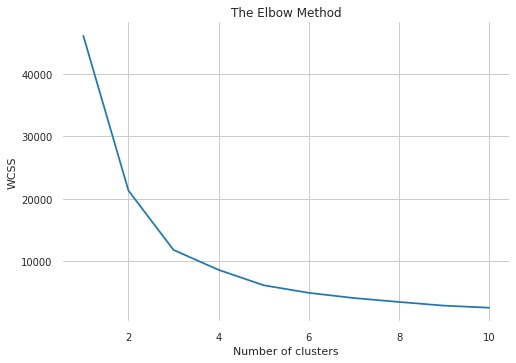

In [27]:
elbowOptimizer(X1)

## Using the dendrogram to find the optimal number of clusters for Annual Income and Spending Score

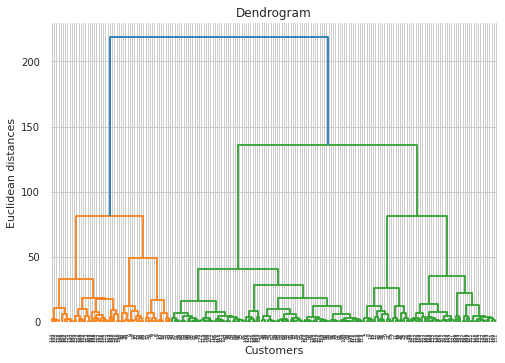

In [28]:
dendoOptimizer(X1)

## Training the K-Means model on Annual Income and Spending Score

In [29]:
kmeans, labels = kmeansTrainer(5, X1)

## Training the Heirarchical model on Annual Income and Spending Score

In [30]:
hc, hc_labels = heirarchicalTrainer(5, X1)

## Visualising the clusters for Annual Income and Spending Score (Kmeans Model)

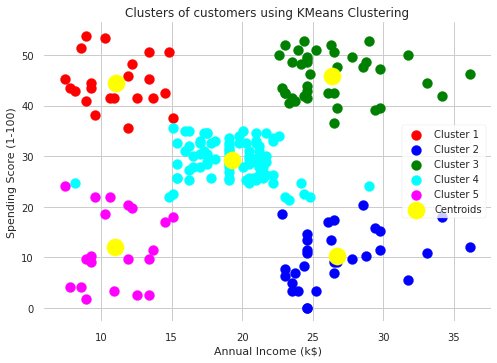

In [31]:
clusterVisualiser(X1, kmeans, 5, labels,
                  'Annual Income (k$)', 'Spending Score (1-100)', 'KMeans Clustering')


## Visualising the clusters for Annual Income and Spending Score (Heirarchical Model)

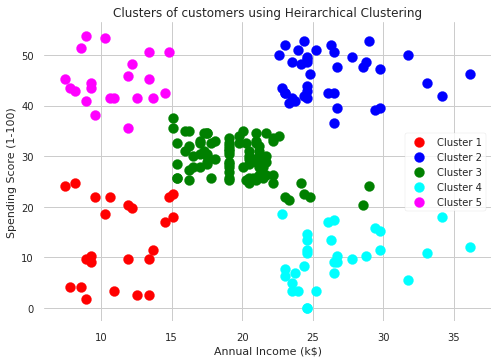

In [32]:
clusterVisualiser(X1, hc, 5, hc_labels,
                  'Annual Income (k$)', 'Spending Score (1-100)', 'Heirarchical Clustering')


# Clustering the dataset on Age and Spending Score

In [33]:
X2 = dataset.iloc[:, [1, 3]].values


## Using the elbow method to find the optimal number of clusters for Age and Spending Score

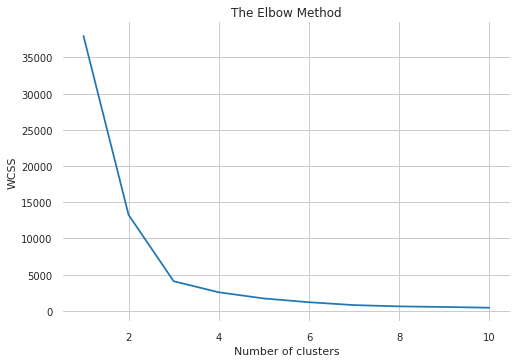

In [34]:
elbowOptimizer(X2)

## Using the dendrogram to find the optimal number of clusters for Annual Income and Spending Score

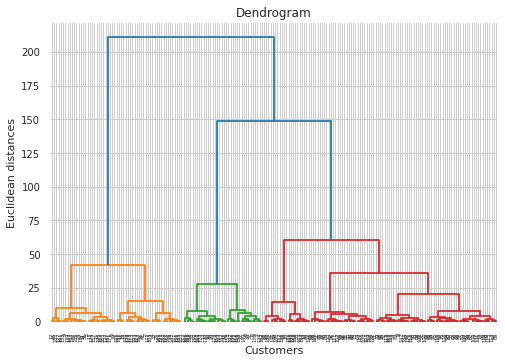

In [35]:
dendoOptimizer(X2)

## Training K-Means Model on Age and Spending Score

In [36]:
kmeans, labels = kmeansTrainer(4, X2)

## Training the Heirarchical model on Age and Spending Score

In [37]:
hc, hc_labels = heirarchicalTrainer(4, X2)

## Visualising the clusters for Age and Spending Score (Kmeans Model)

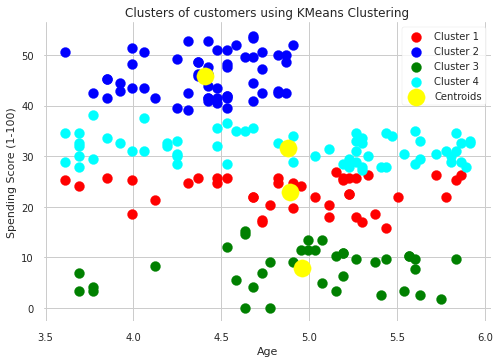

In [38]:
clusterVisualiser(X2, kmeans, 4, labels,
                  'Age', 'Spending Score (1-100)', 'KMeans Clustering')

## Visualising the clusters for Age and Spending Score (Heirarchical Model)

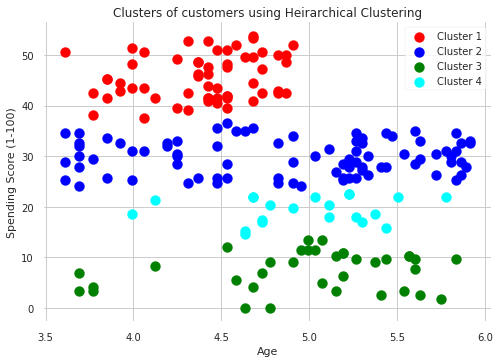

In [39]:
clusterVisualiser(X2, hc, 4, hc_labels,
                  'Age', 'Spending Score (1-100)', 'Heirarchical Clustering')


# Clustering the dataset on Age and Annual Income 

In [40]:
X3 = dataset.iloc[:, [1,2]].values

## Using the elbow method to find the optimal number of clusters for Age and Annual Income

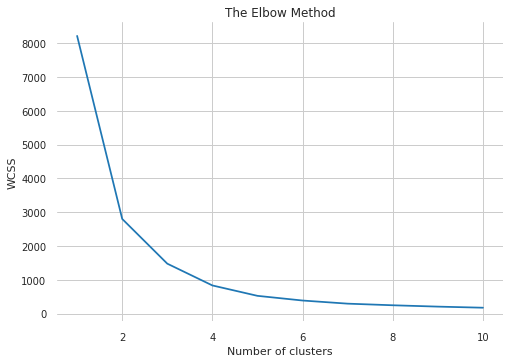

In [41]:
elbowOptimizer(X3)

## Using dendogram to find the optimal number of clusters for Age and Annual Income

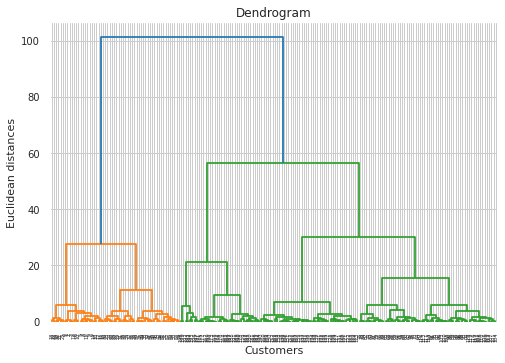

In [42]:
dendoOptimizer(X3)

## Training K-Means Model on Age and Annual Income 

In [43]:
kmeans, labels = kmeansTrainer(5, X3)

## Training Heirarchical Clustering on Age and Annual Income

In [44]:
hc, hc_labels = heirarchicalTrainer(5, X3)

## Visualising the clusters for Age and Annual Income (KMeans Model)

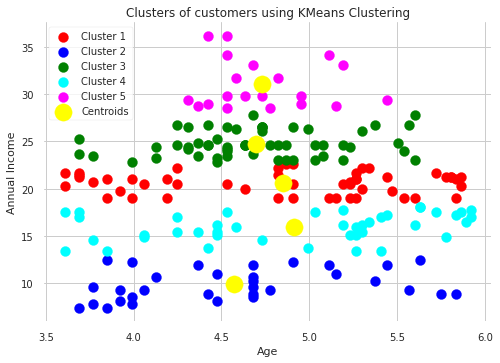

In [45]:
clusterVisualiser(X3, kmeans, 5, labels,
                  'Age', 'Annual Income', 'KMeans Clustering')

## Visualising the clusters for Age and Annual Score (Heirarchical Model)

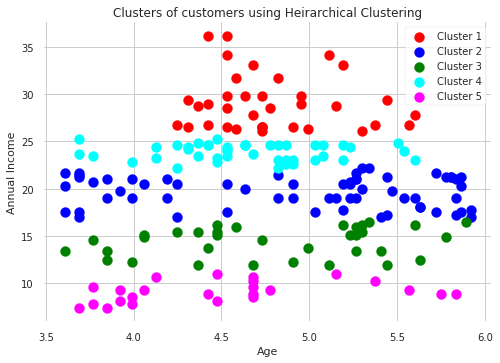

In [46]:
clusterVisualiser(X3, hc, 5, hc_labels,
                  'Age', 'Annual Income', 'Heirarchical Clustering')


# Clustering the dataset on Age, Annual Income and Spending Score

In [47]:
X4 = dataset.iloc[:, 1:]

## Using the elbow method to find the optimal number of clusters for Age, Annual Income and Spending Score

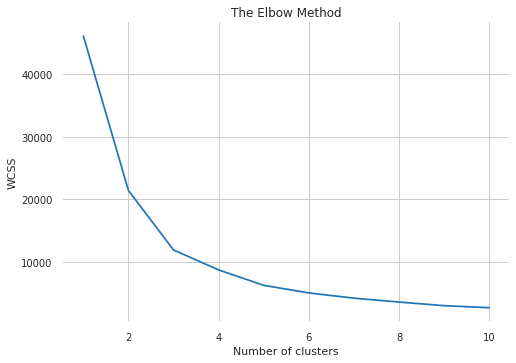

In [48]:
elbowOptimizer(X4)

## Using the dendogram method to find the optimal number of clusters for Age, Annual Income and Spending Score

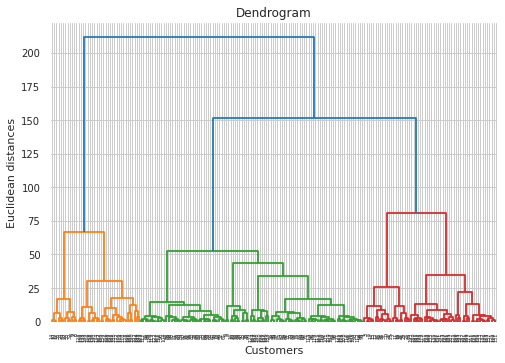

In [49]:
dendoOptimizer(X4)

## Training K-Means Model on Age, Annual Income and Spending Score

In [50]:
kmeans, labels = kmeansTrainer(6, X4)
X4['label'] = labels


## Training Heirarchical Model on Age, Annual Income and Spending Score

In [51]:
hc, hc_labels = heirarchicalTrainer(6, X4)
X4['hc_labels'] = hc_labels

## Visualising the clusters for Age, Annual Income and Spending Score (KMeans Model)

In [52]:
fig = px.scatter_3d(X4, x="Annual Income (k$)", y="Spending Score (1-100)", z="Age",
                    color='label', size='label')
fig.show()


## Visualising the clusters for Age, Annual Income and Spending Score (Heirarchical Model)

In [53]:
fig = px.scatter_3d(X4, x="Annual Income (k$)", y="Spending Score (1-100)", z="Age",
                    color='hc_labels', size='hc_labels')
fig.show()


# **Please Give Feedback by Commenting below and if you like my work please Consider Upvoting.** 